In [2]:
# Importando librerías
import urllib.request
import os
import pandas as pd
import numpy as np
import zipfile
import datetime
import json

## Descargando datos

In [3]:
# Definiendo url, nombres de los archivos y dirección donde se descargarán
ensu_url_1t = "https://www.inegi.org.mx/contenidos/programas/ensu/datosabiertos/conjunto_de_datos_ENSU_2022_1t_csv.zip"
ensu_archivo_1t = "ensu_2022_1t.zip"

ensu_url_2t = "https://www.inegi.org.mx/contenidos/programas/ensu/datosabiertos/conjunto_de_datos_ENSU_2022_2t_csv.zip"
ensu_archivo_2t = "ensu_2022_2t.zip"

ensu_url_3t = "https://www.inegi.org.mx/contenidos/programas/ensu/datosabiertos/conjunto_de_datos_ENSU_2022_3t_csv.zip"
ensu_archivo_3t = "ensu_2022_3t.zip"

sesnsp_url = "https://api.datamexico.org/tesseract/cubes/sesnsp_crimes/aggregate.jsonrecords?captions%5B%5D=Date.Date.Quarter.Quarter+ES&captions%5B%5D=Geography.Geography.State.State+slug+ES&captions%5B%5D=Geography.Geography.Municipality.Municipality+ES&captions%5B%5D=Type.Type.Crime+Type.Crime+Type+ES&cuts%5B%5D=Date.Date.Year.2022&cuts%5B%5D=Type.Type.Crime+Type.202%2C502&drilldowns%5B%5D=Date.Date.Year&drilldowns%5B%5D=Date.Date.Quarter&drilldowns%5B%5D=Geography.Geography.State&drilldowns%5B%5D=Geography.Geography.Municipality&drilldowns%5B%5D=Type.Type.Crime+Type&measures%5B%5D=Value"
sesnsp_archivo = "sesnsp.json"
subdir = "./data/"

In [4]:
# Creando lista de url y archivos para ENSU
ensu_urls = [ensu_url_1t, ensu_url_2t, ensu_url_3t]
ensu_archivos = [ensu_archivo_1t, ensu_archivo_2t, ensu_archivo_3t]

In [5]:
# Descargando datos y creando archivo .txt con la documentación correspondiente
if not os.path.exists(subdir + ensu_archivo_3t):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    for url, archivo in zip(ensu_urls, ensu_archivos):
        urllib.request.urlretrieve(url, subdir + archivo) 
        with zipfile.ZipFile(subdir + archivo, "r") as zip_ref:
            zip_ref.extractall(subdir)  
    
    urllib.request.urlretrieve(sesnsp_url, subdir + sesnsp_archivo)  

    with open(subdir + "info.txt", 'w') as f:
        f.write("Archivos sobre incidencia delictiva y resultados de encuesta sobre percepción de violencia\n")
        info = """
        Se decargaron datos de dos fuentes de información distintas. Por un lado, los datos de incidencias 
        delictivas a nivel estatal, agrupados por tipos de delitos relacionados con la violencia de genero 
        y feminicidios, por estados y por municipios durante el año 2022, como fuente del Secretariado 
        Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP). Estos datos se obtuvieron del sitio web
        https://datamexico.org
        
        Por otro lado, se encuentran los datos que recogen los resultados de la Encuesta Nacional de Seguridad
        Pública Urbana (ENSU) del año 2022; información sobre la percepción de seguridad pública en la población 
        urbana. Estos resultados fueron publicados en el sitio web https://www.inegi.org.mx
        """ 
        f.write(info + '\n')
        f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
        f.write("Desde: " + sesnsp_url + "\n")
        f.write("Nombre: " + sesnsp_archivo + "\n")
        f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
        f.write("Desde: " + "https://www.inegi.org.mx/programas/ensu/#Datos_abiertos" + "\n")

## Leyendo archivos descargados

#### ENSU 2022

In [6]:
# Obteniendo datos donde se resume la información de la encuesta ensu 2022
# 1er Trimestre
dir_1t = subdir + 'conjunto_de_datos_CB_ENSU_03_2022/conjunto_de_datos/conjunto_de_datos_CB_ENSU_03_2022.csv'
df_1t = pd.read_csv(dir_1t)

# 2do Trimestre
dir_2t = subdir + 'conjunto_de_datos_CB_ENSU_06_2022/conjunto_de_datos/conjunto_de_datos_CB_ENSU_06_2022.csv'
df_2t = pd.read_csv(dir_2t)

# 3er Trimestre
dir_3t = subdir + 'conjunto_de_datos_CB_ENSU_09_2022/conjunto_de_datos/conjunto_de_datos_CB_ENSU_09_2022.csv'
df_3t = pd.read_csv(dir_3t)
df_3t.head()

,ID_VIV,ID_PER,UPM,VIV_SEL,R_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,LOC,...,BP4_5_6_7,BP4_5_6_8,BP4_5_6_9,BP5_1,FAC_VIV,FAC_SEL,DOMINIO,EST,UPM_DIS,EST_DIS
0,100071.006,0100071.006.01\r,100071,5,1,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,1,1068,1068,U\r,2,1,137
1,100071.026,0100071.026.01\r,100071,1,1,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,1,1068,1068,U\r,2,1,137
2,100071.033,0100071.033.03\r,100071,2,3,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,1,1068,3204,U\r,2,1,137
3,100071.115,0100071.115.01\r,100071,3,1,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,1,1068,2136,U\r,2,1,137
4,100075.028,0100075.028.02\r,100075,4,2,1,AGUASCALIENTES\r,1,AGUASCALIENTES\r,1,...,\r,\r,\r,3,1030,3090,U\r,3,2,138


#### SESNSP 2022

In [7]:
# Obteniendo datos con la información de delitos ocurridos durante 2021
with open(subdir + sesnsp_archivo, encoding = 'utf8') as fp:
    data_sesnsp = json.load(fp)

print("\nNúmero de entradas: {}".format(len(data_sesnsp)))
print("\nNombre de los atributos: {}".format(", ".join(data_sesnsp.keys())))


Número de entradas: 2

Nombre de los atributos: data, source


In [8]:
# Convirtiendo los datos en dataframe
df_sesnsp = pd.DataFrame(data_sesnsp['data'])
df_sesnsp.head()

,Year,Quarter ID,Quarter,State ID,State,Municipality ID,Municipality,Crime Type ID,Crime Type,Value
0,2022,20221,2022-Q1,1,aguascalientes-ag,1001,Aguascalientes,202,Violencia de Género en Todas sus Modalidades D...,4
1,2022,20221,2022-Q1,1,aguascalientes-ag,1001,Aguascalientes,502,Feminicidio,3
2,2022,20221,2022-Q1,1,aguascalientes-ag,1002,Asientos,202,Violencia de Género en Todas sus Modalidades D...,0
3,2022,20221,2022-Q1,1,aguascalientes-ag,1002,Asientos,502,Feminicidio,0
4,2022,20221,2022-Q1,1,aguascalientes-ag,1003,Calvillo,202,Violencia de Género en Todas sus Modalidades D...,0


## Analizando calidad de los datos

#### ENSU 2022

In [9]:
# Analizando si hay datos faltantes
print(' Datos faltantes 1er trimestre: ', df_1t.isna().sum().sum(), '\n',
      'Datos faltantes 2er trimestre: ', df_2t.isna().sum().sum(), '\n',
      'Datos faltantes 3er trimestre: ', df_3t.isna().sum().sum(), '\n')

 Datos faltantes 1er trimestre:  0 
 Datos faltantes 2er trimestre:  0 
 Datos faltantes 3er trimestre:  0 



In [10]:
# En teoría no existen datos faltantes, sin embargo el caracter \r se podría tomar como tal 
# además de que crea ruido en las observaciones
df_1t['BP3_2'].value_counts(dropna=False)

3\r    10066
2\r     6194
4\r     5861
1\r      826
\r       471
9\r      159
Name: BP3_2, dtype: int64

In [11]:
# Sustituyendo datos ruidosos
df_1t = df_1t.replace(['\r', '9\r', '1\r', '2\r', '3\r', '4\r'],[9, 9, 1, 2, 3, 4])
df_1t = df_1t.replace('\r', '', regex=True)

df_2t = df_2t.replace(['\r', '9\r', '1\r', '2\r', '3\r', '4\r'],[9, 9, 1, 2, 3, 4])
df_2t = df_2t.replace('\r', '', regex=True)

df_3t = df_3t.replace(['\r', '9\r', '1\r', '2\r', '3\r', '4\r'],[9, 9, 1, 2, 3, 4])
df_3t = df_3t.replace('\r', '', regex=True)

In [12]:
# Verificando que no hay registros duplicados
print(' Registros duplicados 1er trimestre: ', df_1t[df_1t.duplicated()].shape[0], '\n',
      'Registros duplicados 2er trimestre: ', df_2t[df_2t.duplicated()].shape[0], '\n',
      'Registros duplicados 3er trimestre: ', df_3t[df_3t.duplicated()].shape[0], '\n')

 Registros duplicados 1er trimestre:  0 
 Registros duplicados 2er trimestre:  0 
 Registros duplicados 3er trimestre:  0 



#### SESNSP 2021

In [13]:
# Analizando si hay datos faltantes
df_sesnsp.isna().sum()

Year                0
Quarter ID          0
Quarter             0
State ID            0
State              18
Municipality ID     0
Municipality        0
Crime Type ID       0
Crime Type          0
Value               0
dtype: int64

In [14]:
# Remplazando los valores faltantes por 'N/A'
df_sesnsp = df_sesnsp.replace(np.nan, 'N/A')

# Analizando donde faltan los valores
df_sesnsp[['State ID','State']].value_counts()

State ID  State                             
20        oaxaca-oa                             3420
21        puebla-pu                             1302
30        veracruz-de-ignacio-de-la-llave-ve    1272
15        mexico-em                              750
14        jalisco-jc                             750
7         chiapas-cs                             744
16        michoacan-de-ocampo-mi                 678
31        yucatan-yu                             636
13        hidalgo-hg                             504
12        guerrero-gr                            486
26        sonora-so                              432
8         chihuahua-ch                           402
29        tlaxcala-tl                            360
24        san-luis-potosi-sl                     348
32        zacatecas-za                           348
19        nuevo-leon-nl                          306
11        guanajuato-gt                          276
28        tamaulipas-tm                          258
1

In [15]:
df_sesnsp[df_sesnsp['State']=='N/A'].head()

,Year,Quarter ID,Quarter,State ID,State,Municipality ID,Municipality,Crime Type ID,Crime Type,Value
3160,2022,20221,2022-Q1,20,N/A,20999,No Informado,202,Violencia de Género en Todas sus Modalidades D...,0
3161,2022,20221,2022-Q1,20,N/A,20999,No Informado,502,Feminicidio,0
3950,2022,20221,2022-Q1,26,N/A,26999,No Informado,202,Violencia de Género en Todas sus Modalidades D...,0
3951,2022,20221,2022-Q1,26,N/A,26999,No Informado,502,Feminicidio,0
4616,2022,20221,2022-Q1,30,N/A,30999,No Informado,202,Violencia de Género en Todas sus Modalidades D...,0


Según el análisis anterior, faltan algunos valores correspondientes a nombres de tres estados, donde la información de los municipios también es No Informado, por tanto, teniendo en cuenta que no es una cantidad significativa, es conveniente eliminarlos

In [16]:
# Eliminando valores faltantes
df_sesnsp = df_sesnsp[df_sesnsp['State']!='N/A']                       

In [17]:
# Verificando que no hay registros duplicados
df_sesnsp[df_sesnsp.duplicated()].shape[0]

0

## Extrayendo información de los datos

#### SESNSP 2022

In [34]:
# Cantidad de crímenes de violencia contra la mujer por municipios en Sonora
df_sesnsp_sonora = df_sesnsp[df_sesnsp['State ID']==26]
df_sesnsp_crimenes = df_sesnsp_sonora.groupby(['Quarter', 'State', 'Municipality']).sum()[['Value']].reset_index()
df_sesnsp_crimenes.columns = ['TRIMESTRES', 'ESTADO', 'MUNICIPIO', 'DELITOS'] 
df_sesnsp_crimenes.head()

,TRIMESTRES,ESTADO,MUNICIPIO,DELITOS
0,2022-Q1,sonora-so,Aconchi,0
1,2022-Q1,sonora-so,Agua Prieta,1
2,2022-Q1,sonora-so,Altar,0
3,2022-Q1,sonora-so,Arivechi,0
4,2022-Q1,sonora-so,Arizpe,0


#### ENSU 2022

In [19]:
#Obteniendo datos sobre la cantidad de mujeres encuestadas en Sonora

df_mujer_1t = df_1t[(df_1t['SEXO'] == 2) & (df_1t['CVE_ENT'] == 26)]
df_mujer_2t = df_2t[(df_2t['SEXO'] == 2) & (df_2t['CVE_ENT'] == 26)]
df_mujer_3t = df_3t[(df_3t['SEXO'] == 2) & (df_3t['CVE_ENT'] == 26)]
df_mujer_2t.head()

,ID_VIV,ID_PER,UPM,VIV_SEL,R_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,LOC,...,BP4_1_7,BP4_1_8,BP4_1_9,BP5_1,FAC_VIV,FAC_SEL,DOMINIO,EST,UPM_DIS,EST_DIS
19794,2600066.043,2600066.043.01,2600066,4,1,26,Sonora,18,Cajeme,1,...,2,2,2,3,462,2308,U,4,4501,258
19795,2600066.060,2600066.060.03,2600066,1,3,26,Sonora,18,Cajeme,1,...,2,2,2,2,462,1385,U,4,4501,258
19796,2600066.115,2600066.115.02,2600066,2,2,26,Sonora,18,Cajeme,1,...,2,2,2,2,462,923,U,4,4501,258
19799,2600072.046,2600072.046.02,2600072,2,2,26,Sonora,18,Cajeme,1,...,2,2,2,2,381,762,U,3,4502,257
19801,2600072.095,2600072.095.01,2600072,3,1,26,Sonora,18,Cajeme,1,...,2,2,2,1,381,381,U,3,4502,257


In [20]:
# Cantidad de mujeres encuestadas por municipios
df_encuesta_1 = df_mujer_1t.groupby(['NOM_ENT', 'NOM_MUN']).count()
df_encuesta_1 = df_encuesta_1[['ID_PER']]
df_encuesta_1['TRIMESTRES'] = '2022-Q1'

df_encuesta_2 = df_mujer_2t.groupby(['NOM_ENT', 'NOM_MUN']).count()
df_encuesta_2 = df_encuesta_2[['ID_PER']]
df_encuesta_2['TRIMESTRES'] = '2022-Q2'

df_encuesta_3 = df_mujer_3t.groupby(['NOM_ENT', 'NOM_MUN']).count()
df_encuesta_3 = df_encuesta_3[['ID_PER']]
df_encuesta_3['TRIMESTRES'] = '2022-Q3'
df_encuesta_2.head()

ID_PER TRIMESTRES
NOM_ENT NOM_MUN                      
Sonora  Cajeme         129    2022-Q2
        Hermosillo     150    2022-Q2
        Nogales        127    2022-Q2

In [21]:
# Obteniendo datos sobre la cantidad de mujeres encuestadas que creen q su ciudad es insegura
df_ciudad_1t = df_mujer_1t[df_mujer_1t['BP1_1'] == 2]
df_ciudad_2t = df_mujer_2t[df_mujer_2t['BP1_1'] == 2]
df_ciudad_3t = df_mujer_3t[df_mujer_3t['BP1_1'] == 2]

In [22]:
# Cantidad de mujeres encuestadas que creen q su ciudad es insegura
violencia_estados_1 = df_ciudad_1t.groupby(['NOM_ENT', 'NOM_MUN']).count()
violencia_estados_1 = violencia_estados_1[['ID_PER']]

violencia_estados_2 = df_ciudad_2t.groupby(['NOM_ENT', 'NOM_MUN']).count()
violencia_estados_2 = violencia_estados_2[['ID_PER']]

violencia_estados_3 = df_ciudad_3t.groupby(['NOM_ENT', 'NOM_MUN']).count()
violencia_estados_3 = violencia_estados_3[['ID_PER']]
violencia_estados_3.head()

ID_PER
NOM_ENT NOM_MUN           
SONORA  CAJEME         122
        HERMOSILLO      99
        NOGALES         72

In [23]:
# Creando dataframe de percepción de seguridad de la mujer
violencia_percepcion_1 = pd.merge(violencia_estados_1, df_encuesta_1, on=['NOM_ENT', 'NOM_MUN'] )
violencia_percepcion_2 = pd.merge(violencia_estados_2, df_encuesta_2, on=['NOM_ENT', 'NOM_MUN'] )    
violencia_percepcion_3 = pd.merge(violencia_estados_3, df_encuesta_3, on=['NOM_ENT', 'NOM_MUN'] )

In [25]:
#Eliminando columnas como índices
violencia_percepcion_1.reset_index(inplace=True)
violencia_percepcion_2.reset_index(inplace=True)
violencia_percepcion_3.reset_index(inplace=True)

In [27]:
#Normalizando nombres de los estados y municipios
violencia_percepcion_3['NOM_ENT'] = [ent.lower().capitalize() for ent in violencia_percepcion_3['NOM_ENT']]
violencia_percepcion_3['NOM_MUN'] = [mun.lower().capitalize() for mun in violencia_percepcion_3['NOM_MUN']]

violencia_percepcion_3.head()

,NOM_ENT,NOM_MUN,ID_PER_x,ID_PER_y,TRIMESTRES
0,Sonora,Cajeme,122,129,2022-Q3
1,Sonora,Hermosillo,99,144,2022-Q3
2,Sonora,Nogales,72,131,2022-Q3


In [28]:
# Concatenando los datos de los tres trimestres
violencia_percepcion = pd.concat([violencia_percepcion_1, violencia_percepcion_2, violencia_percepcion_3], axis=0)

In [29]:
violencia_percepcion.columns = ['ESTADO', 'MUNICIPIO', 'MUJERES_INSEGURAS', 'TOTAL_MUJERES', 'TRIMESTRES']
violencia_percepcion

,ESTADO,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,TRIMESTRES
0,Sonora,Cajeme,127,134,2022-Q1
1,Sonora,Hermosillo,99,153,2022-Q1
2,Sonora,Nogales,74,129,2022-Q1
0,Sonora,Cajeme,120,129,2022-Q2
1,Sonora,Hermosillo,97,150,2022-Q2
2,Sonora,Nogales,84,127,2022-Q2
0,Sonora,Cajeme,122,129,2022-Q3
1,Sonora,Hermosillo,99,144,2022-Q3
2,Sonora,Nogales,72,131,2022-Q3


In [30]:
# Tasa de prevalencia de la violencia: MUJERES_VIOLENTADAS/TOTAL_MUJERES
violencia_percepcion['PERCEPCION_VIOLENCIA'] =  violencia_percepcion['MUJERES_INSEGURAS']/violencia_percepcion['TOTAL_MUJERES']
 
violencia_percepcion

,ESTADO,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,TRIMESTRES,PERCEPCION_VIOLENCIA
0,Sonora,Cajeme,127,134,2022-Q1,0.947761
1,Sonora,Hermosillo,99,153,2022-Q1,0.647059
2,Sonora,Nogales,74,129,2022-Q1,0.573643
0,Sonora,Cajeme,120,129,2022-Q2,0.930233
1,Sonora,Hermosillo,97,150,2022-Q2,0.646667
2,Sonora,Nogales,84,127,2022-Q2,0.661417
0,Sonora,Cajeme,122,129,2022-Q3,0.945736
1,Sonora,Hermosillo,99,144,2022-Q3,0.687500
2,Sonora,Nogales,72,131,2022-Q3,0.549618


In [35]:
# Creando dataframe final sobre la relacion de crímenes de violencia contra la mujer y la percepción de violencia
# de violencia según encuesta
df = pd.merge(violencia_percepcion, df_sesnsp_crimenes, on=['TRIMESTRES', 'MUNICIPIO'])
df = df[['TRIMESTRES', 'MUNICIPIO', 'MUJERES_INSEGURAS', 'TOTAL_MUJERES', 'PERCEPCION_VIOLENCIA', 'DELITOS']]
df

,TRIMESTRES,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,PERCEPCION_VIOLENCIA,DELITOS
0,2022-Q1,Cajeme,127,134,0.947761,0
1,2022-Q1,Hermosillo,99,153,0.647059,1
2,2022-Q1,Nogales,74,129,0.573643,0
3,2022-Q2,Cajeme,120,129,0.930233,0
4,2022-Q2,Hermosillo,97,150,0.646667,1
5,2022-Q2,Nogales,84,127,0.661417,3
6,2022-Q3,Cajeme,122,129,0.945736,1
7,2022-Q3,Hermosillo,99,144,0.687500,0
8,2022-Q3,Nogales,72,131,0.549618,1


In [36]:
# Añadiendo fecha según el trimestre
df['FECHA'] = pd.PeriodIndex(df['TRIMESTRES'], freq='Q').to_timestamp()
df.dtypes

TRIMESTRES                      object
MUNICIPIO                       object
MUJERES_INSEGURAS                int64
TOTAL_MUJERES                    int64
PERCEPCION_VIOLENCIA           float64
DELITOS                          int64
FECHA                   datetime64[ns]
dtype: object

In [37]:
df

,TRIMESTRES,MUNICIPIO,MUJERES_INSEGURAS,TOTAL_MUJERES,PERCEPCION_VIOLENCIA,DELITOS,FECHA
0,2022-Q1,Cajeme,127,134,0.947761,0,2022-01-01
1,2022-Q1,Hermosillo,99,153,0.647059,1,2022-01-01
2,2022-Q1,Nogales,74,129,0.573643,0,2022-01-01
3,2022-Q2,Cajeme,120,129,0.930233,0,2022-04-01
4,2022-Q2,Hermosillo,97,150,0.646667,1,2022-04-01
5,2022-Q2,Nogales,84,127,0.661417,3,2022-04-01
6,2022-Q3,Cajeme,122,129,0.945736,1,2022-07-01
7,2022-Q3,Hermosillo,99,144,0.687500,0,2022-07-01
8,2022-Q3,Nogales,72,131,0.549618,1,2022-07-01


## EDA

#### Automático

In [38]:
import sweetviz

sw_insurance = sweetviz.analyze(df)
sw_insurance.show_html("eda-sweetview.html")


                                             |                                             | [  0%]   00:00 ->…

Report eda-sweetview.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### EDA: Relación entre variables

In [40]:
df.describe()

,MUJERES_INSEGURAS,TOTAL_MUJERES,PERCEPCION_VIOLENCIA,DELITOS
count,9.000000,9.000000,9.000000,9.000000
mean,99.333333,136.222222,0.732182,0.777778
std,20.420578,10.034662,0.162531,0.971825
min,72.000000,127.000000,0.549618,0.000000
25%,84.000000,129.000000,0.646667,0.000000
50%,99.000000,131.000000,0.661417,1.000000
75%,120.000000,144.000000,0.930233,1.000000
max,127.000000,153.000000,0.947761,3.000000


In [56]:
import plotly.express as px
fig = px.scatter(df, x="PERCEPCION_VIOLENCIA", y="DELITOS", color="MUNICIPIO")
fig.update_layout(width=500,
                  height=400
)
fig.show()

In [62]:
fig = px.histogram(df, x='FECHA', y='DELITOS')
fig.update_layout(width=500, height=400)
fig.show()

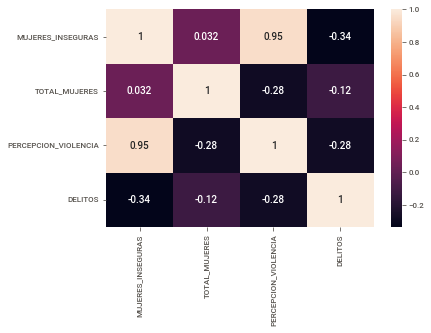

In [43]:
import seaborn as sn
import matplotlib.pyplot as plt

# Correlación de Pearson
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

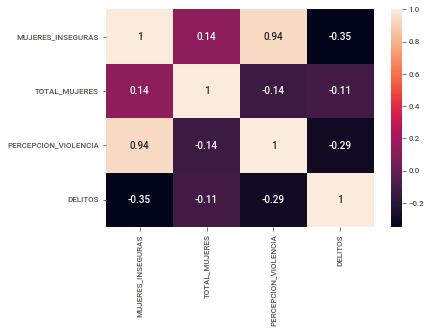

In [49]:
# Correlación de Spearman
corr_matrix = df.corr(method='spearman')
sn.heatmap(corr_matrix, annot=True)
plt.show()